# Ojective
**To classify a given new review using Logistic regression technique.**

# Loading libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Reading data

In [2]:
df=pd.read_csv("data.csv")
df.columns

Index(['Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'Class'],
      dtype='object')

# Train and test dataset
Dataset is diveided into two parts in which 67% data is train data and 33% of the data is test data which is used to validate the performance of the dataset

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df['Text'],df['Class'],test_size=0.33,shuffle=False)
print(df_train_x.shape,df_test_x.shape,df_train_y.shape,df_test_y.shape)

(67000,) (33000,) (67000,) (33000,)


# BOW-Unigrams

In [4]:
bow_unigrams=CountVectorizer(stop_words='english')
BOW1_train=bow_unigrams.fit(df_train_x)
BOW1_train=bow_unigrams.transform(df_train_x)
BOW1_test=bow_unigrams.transform(df_test_x)
print("The train data shape is ",BOW1_train.shape,"and test data shape is ",BOW1_test.shape)

The train data shape is  (67000, 90770) and test data shape is  (33000, 90770)


# Data standardization

In [5]:
from sklearn.exceptions import DataConversionWarning
from sklearn import warnings
warnings.filterwarnings("ignore", category=DataConversionWarning)

std=StandardScaler(with_mean=False)
std=std.fit(BOW1_train)
BOW1_train = BOW1_train.astype(float)
BOW1_test = BOW1_test.astype(float)
BOW1_train_std=std.transform(BOW1_train)
BOW1_test_std=std.transform(BOW1_test)
print(BOW1_train_std.shape,BOW1_test_std.shape)

(67000, 90770) (33000, 90770)


In [6]:
from sklearn import preprocessing
bin=preprocessing.LabelEncoder()
df_train_y=bin.fit_transform(df_train_y)
df_test_y=bin.fit_transform(df_test_y)

# Hyperparameter tuning -Grid search

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
def grid_search(BOW1_train_std,df_train_y,filename):
    parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,'penalty': ['l1', 'l2']}
    lr=LogisticRegression(n_jobs=-1,max_iter=100,tol=0.1)
    cv=GridSearchCV(lr,parameters,cv=3,scoring='f1')
    best_model=cv.fit(BOW1_train_std,df_train_y)
    x=pd.DataFrame(best_model.cv_results_)
    x.to_csv(filename)

# Hyperparameter tuning -Random search

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

def random_search(BOW1_train_std,df_train_y,filename):
    param_distributions={'C':np.logspace(-1,4,50),'penalty': ['l1', 'l2']}
    lr1=LogisticRegression(n_jobs=-1,max_iter=100,tol=0.1)
    cv1=RandomizedSearchCV(lr1,param_distributions,cv=3,scoring='f1')
    best_model1=cv1.fit(BOW1_train_std,df_train_y)
    x=pd.DataFrame(best_model1.cv_results_)
    x.to_csv(filename)

# draw random and grid search reulsts

In [43]:
import ast
from IPython.display import display, HTML
def read_table_data(filename):
    x=pd.read_csv(filename)
    lambda_value=[]
    regularization=[]
    cv_score=[]
    for x1 in x[['params','mean_test_score']].values:
        a=ast.literal_eval(x1[0])
        cv_score.append(x1[1])
        lambda_value.append(a['C'])
        regularization.append(a['penalty'])
    results=pd.DataFrame({'lambda_value':lambda_value,'regularization':regularization,'cv_score':cv_score})
    zz=results.sort_values(by=['cv_score','regularization'],ascending=False)
    display(zz)

In [ ]:
grid_search(BOW1_train_std,df_train_y,'unigrams_result_grid.csv') #performed grid search
random_search(BOW1_train_std,df_train_y,'bow_uni_random.csv') # performed random search

In [10]:
print("*********** Results of Grid search ***********")
read_table_data('unigrams_result_grid.csv')
print("*********** Results of Random search ***********")
read_table_data('bow_uni_random.csv')

*********** Results of Grid search ***********


,lambda_value,regularization,cv_score
3,0.010,l2,0.942870
7,1.000,l2,0.942870
5,0.100,l2,0.942863
9,10.000,l2,0.942863
11,100.000,l2,0.942863
13,1000.000,l2,0.942863
8,10.000,l1,0.942863
12,1000.000,l1,0.942863
1,0.001,l2,0.942856
6,1.000,l1,0.942856


*********** Results of Random search ***********


,lambda_value,regularization,cv_score
1,28.117687,l2,0.942878
4,0.126486,l2,0.942878
8,0.159986,l1,0.942863
3,44.984327,l2,0.942863
0,4.291934,l1,0.942863
9,596.362332,l1,0.942863
2,1.676833,l2,0.942856
5,115.139540,l1,0.942856
7,0.323746,l1,0.942856
6,1.676833,l1,0.942848


**The best results for Both L1 and L2 reguarization are found at :**

 For L2 - >  cv_score is **0.942870** and C=**0.010 , 1.0 , 0.1,10,100,28.11** (C= 1 / lambda)
 
 
 For L1 - >  cv_score is **0.942863** and C=**10, 1000,1.0,100,0.010,0.15,4.3**
 
 so lets try the test data validation on this parameters
 
 
 
 



# L2-regularization with Bag of words unigrams

In [57]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.010,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.012,  n_jobs=-1)
lr_2=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=28.11,  n_jobs=-1)
lr_3=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.10,  n_jobs=-1)
lr_4=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=1.0,  n_jobs=-1)
lr_5=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=100,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


# Plotting the confusion matrix 

In [58]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(lr_1.predict(BOW1_test_std))
outputs.append(lr_2.predict(BOW1_test_std))
outputs.append(lr_3.predict(BOW1_test_std))
outputs.append(lr_4.predict(BOW1_test_std))
outputs.append(lr_5.predict(BOW1_test_std))
outputs.append(lr_6.predict(BOW1_test_std))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

In [15]:

def plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,nrows=2,ncols=2):
    fig, ax = plt.subplots(figsize=(20,15),nrows=nrows, ncols=ncols)
    i=0
    for row in ax:
        for col in row:
            sb.heatmap(dfs[i], annot=True, fmt='g',ax=col)
            col.title.set_text('L2-regularizatiton with C='+str(C_values[i]))
            col.set_xlabel('Predicted label')
            col.set_ylabel('True label')
            i+=1

    pre_scores=[]
    re_scores=[]
    accuracy_scores=[]
    f2_scores=[]
    non_zero_ws=[]
    sparsity=[]
    for i in range(nrows*ncols):
        pre_scores.append(precision_score(df_test_y,outputs[i]))
        re_scores.append(recall_score(df_test_y,outputs[i]))
        accuracy_scores.append(accuracy_score(df_test_y,outputs[i]))
        f2_scores.append(f1_score(df_test_y,outputs[i]))
    non_zero_ws.append(np.count_nonzero(lr_1.coef_))
    non_zero_ws.append(np.count_nonzero(lr_2.coef_))
    non_zero_ws.append(np.count_nonzero(lr_3.coef_))
    non_zero_ws.append(np.count_nonzero(lr_4.coef_))
    non_zero_ws.append(np.count_nonzero(lr_5.coef_))
    non_zero_ws.append(np.count_nonzero(lr_6.coef_))
    sparsity.append(np.count_nonzero(lr_1.coef_)/ len(lr_1.coef_[0]))
    sparsity.append(np.count_nonzero(lr_2.coef_)/ len(lr_2.coef_[0]))
    sparsity.append(np.count_nonzero(lr_3.coef_)/ len(lr_3.coef_[0]))
    sparsity.append(np.count_nonzero(lr_4.coef_)/ len(lr_4.coef_[0]))
    sparsity.append(np.count_nonzero(lr_5.coef_)/ len(lr_5.coef_[0]))
    sparsity.append(np.count_nonzero(lr_6.coef_)/ len(lr_6.coef_[0]))
    from beautifultable import BeautifulTable
    table=BeautifulTable()
    table.insert_column(0,"precision",pre_scores)
    table.insert_column(1,"recall",re_scores)
    table.insert_column(2,"accuracy",accuracy_scores)
    table.insert_column(3,"f1-score",f2_scores)
    table.insert_column(4,"Non-zero",non_zero_ws)
    table.insert_column(5,"sparsity(Non-zero weights)",sparsity)
    table.insert_column(6,"C",C_values)
    sorted_table=table.sort('C')
    print(table)   

+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.929  | 0.935  |  0.881   |  0.932   |  90770   |        1.0        |   0   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.928  | 0.957  |  0.897   |  0.942   |  90770   |        1.0        | 0.01  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.928  | 0.955  |  0.896   |  0.942   |  90770   |        1.0        | 0.012 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.929  | 0.892  |  0.845   |   0.91   |  90770   |        1.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.928  | 0.915  |  0.864  

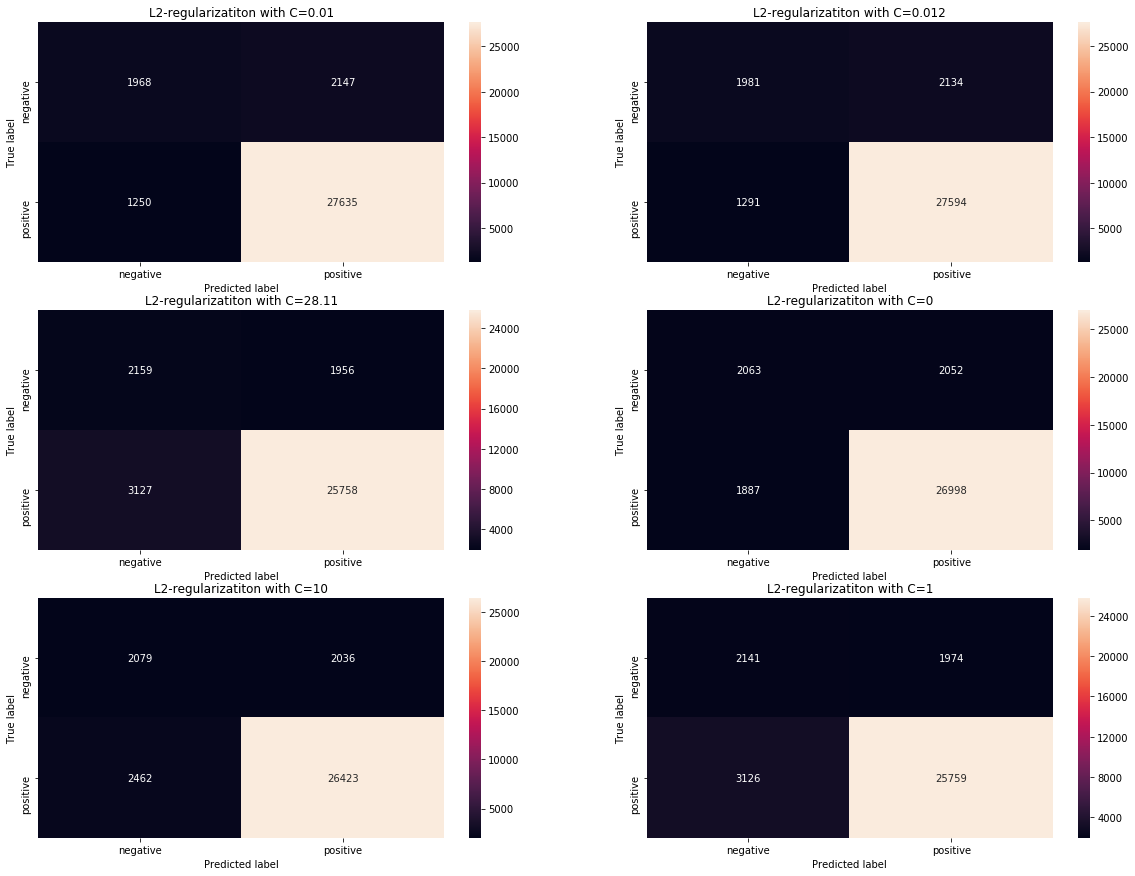

In [64]:
C_values=[0.010,0.012,28.11,0,10,1]
plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,3,2)



# Observation:
   **As the value of C(1 / lambda), Generalization is improved, which we can clearly seen that error on unseen data decreases**


# Multicolinearity check (pertubation test) function

In [27]:
def add_noise(BOW1_train_std):
    new_noise_added_train_data=BOW1_train_std
    Epsilon=np.random.normal(0,0.01)
    print('Adding noise to every feature is ',Epsilon)
    count=0
    for review in new_noise_added_train_data:
        if(count%10000==0):
            print('count is ',count)
        non_zero_indices=review.nonzero()
        non_zero_indices=non_zero_indices[1]
        for index in non_zero_indices:
          new_noise_added_train_data[count,index]+=Epsilon
        count+=1
    return new_noise_added_train_data

In [68]:
new_noise_added_train_data=add_noise(BOW1_train_std)

Adding noise to every feature is  0.0011024007994988462
count is  0
count is  10000
count is  20000
count is  30000
count is  40000
count is  50000
count is  60000


In [69]:
lr_multi_colinearity=LogisticRegression(penalty='l2', tol=0.0001, C=0.01,  n_jobs=-1)
lr_colinearity=lr_multi_colinearity.fit(new_noise_added_train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [70]:
print('Before pertubation',lr_colinearity.coef_[0])
print("**************************************")
print('After pertubation',lr_1.coef_[0])

Before pertubation [ 3.15915600e-02  5.83517997e-03  5.62645245e-03 ...  7.06793915e-03
 -1.57795577e-06  1.60911456e-07]
**************************************
After pertubation [ 3.15421582e-02  5.83340838e-03  5.61348826e-03 ...  7.06867726e-03
 -1.18420734e-06  2.70140107e-07]


In [71]:
np.sort(lr_1.coef_[0]-lr_colinearity.coef_[0])[-10:]

array([0.0001683 , 0.00017448, 0.00018133, 0.00018469, 0.00028134,
       0.00029295, 0.00030481, 0.00034399, 0.00043667, 0.00074849])

**From above multicolinearity test we can observe that features are not changling a lot due to small change in feature values and maximum change around features is 0.0007 , so we can conclude that features are not colinear.
**
# so there is no multicolinearity

# Feature importance

In [36]:
def print_features(lr_1):
    c=np.argsort(lr_1.coef_)
    c=c[0][-20:]
    imp_features=[bow_unigrams.get_feature_names()[s] for s in c ]
    weights=[lr_1.coef_[0][index] for index in c]
    from beautifultable import BeautifulTable
    table=BeautifulTable()
    table.insert_column(0,"Top 20 important features ",np.flip(imp_features,axis=0))
    table.insert_column(1,"Weight ",np.flip(weights,axis=0))
    print(table)

In [73]:
print_features(lr_1)

+----------------------------+---------+
| Top 20 important features  | Weight  |
+----------------------------+---------+
|           great            |  0.75   |
+----------------------------+---------+
|            best            |  0.588  |
+----------------------------+---------+
|            love            |  0.474  |
+----------------------------+---------+
|            good            |  0.458  |
+----------------------------+---------+
|         delicious          |  0.389  |
+----------------------------+---------+
|          favorite          |  0.363  |
+----------------------------+---------+
|           loves            |  0.341  |
+----------------------------+---------+
|         wonderful          |  0.321  |
+----------------------------+---------+
|          perfect           |  0.308  |
+----------------------------+---------+
|         excellent          |  0.301  |
+----------------------------+---------+
|           highly           |  0.271  |
+---------------

# L1 regularization with Bag of words unigrams

In [11]:
#C=[10, 1000,1.0,100,0.010,0.15,4.3]
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l1', tol=0.0001, C=10,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.15,  n_jobs=-1)
lr_2=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=4.3,  n_jobs=-1)
lr_3=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.010,  n_jobs=-1)
lr_4=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=100,  n_jobs=-1)
lr_5=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.001,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [21]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(lr_1.predict(BOW1_test_std))
outputs.append(lr_2.predict(BOW1_test_std))
outputs.append(lr_3.predict(BOW1_test_std))
outputs.append(lr_4.predict(BOW1_test_std))
outputs.append(lr_5.predict(BOW1_test_std))
outputs.append(lr_6.predict(BOW1_test_std))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))


+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.881  | 0.999  |  0.881   |  0.936   |    43    |        0.0        | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.917  | 0.982  |  0.906   |  0.948   |   6681   |       0.074       | 0.01  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.934  | 0.952  |   0.9    |  0.943   |  16997   |       0.187       | 0.15  |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.93  | 0.916  |  0.866   |  0.923   |  18601   |       0.205       |  4.3  |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.93  | 0.912  |  0.863  

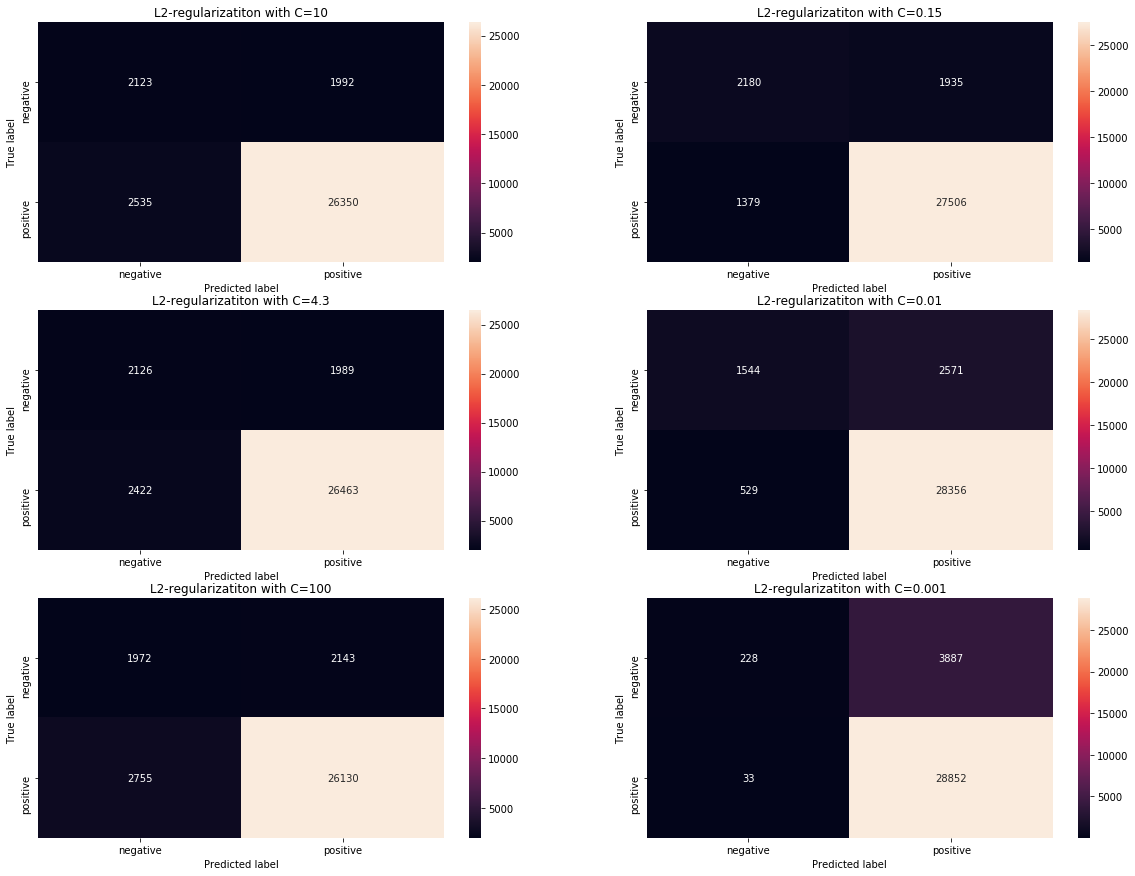

In [23]:
C_values=[10,0.15,4.3,0.010,100,0.001]
plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,3,2)

# Observation

As the C increasing the the sparisty in weight vectors also increasing  , we can observe that for different values of C values .

**1.For value of C=1000(inverse strength) we have sparsity is 46.3 (46.3% of weights are are non-zero)**

**2.For value of C=0.15 we have sparisty as 18.7 (only 18.7% are non-zero and remaining are zero)**

From both 1 & 2,

we can conclude that as the C decreases the sparsity in the weight vectors also increasing.

And one more point is as the C is decreasing the model is underfitting, so the precisioin and recall score going to fall down as we can observe that one from the above table.

# Multicolinearity check (pertubation test)

In [28]:
new_noise_added_train_data=add_noise(BOW1_train_std)

Adding noise to every feature is  -0.0242165243647795
count is  0
count is  10000
count is  20000
count is  30000
count is  40000
count is  50000
count is  60000


In [32]:
lr_multi_colinearity=LogisticRegression(penalty='l1', tol=0.0001, C=4.3,  n_jobs=-1)
lr_colinearity=lr_multi_colinearity.fit(new_noise_added_train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [33]:
print('Before pertubation',lr_colinearity.coef_[0])
print("**************************************")
print('After pertubation',lr_3.coef_[0])

Before pertubation [0.01775329 0.         0.         ... 0.         0.         0.        ]
**************************************
After pertubation [0.04665548 0.         0.         ... 0.         0.         0.        ]


In [34]:
#print(lr_1.coef_[0][24576],lr_colinearity.coef_[0][24576])#24576
np.sort(lr_1.coef_[0]-lr_colinearity.coef_[0])[-10:]

array([0.59828875, 0.63343711, 0.63507472, 0.66006194, 0.6662794 ,
       0.67422629, 0.69134132, 0.76436877, 0.85844107, 1.04880225])

**From above multicolinearity test we can observe that features are changling due to small change in feature values , and some feaaures changes its weight more than 0.5** 

# feature importance

In [37]:
print_features(lr_3)

+----------------------------+---------+
| Top 20 important features  | Weight  |
+----------------------------+---------+
|           great            |  3.307  |
+----------------------------+---------+
|            best            |  2.585  |
+----------------------------+---------+
|          perfect           |  2.111  |
+----------------------------+---------+
|            yum             |   2.0   |
+----------------------------+---------+
|            love            |  1.987  |
+----------------------------+---------+
|           agave            |  1.931  |
+----------------------------+---------+
|         excellent          |  1.711  |
+----------------------------+---------+
|           breath           |  1.653  |
+----------------------------+---------+
|         sparkling          |  1.56   |
+----------------------------+---------+
|            good            |  1.518  |
+----------------------------+---------+
|            long            |  1.513  |
+---------------

# Bigrams - Bag of words

In [38]:
bow_unigrams=CountVectorizer(ngram_range=(1,2),stop_words='english')
BOW1_train=bow_unigrams.fit(df_train_x)
BOW1_train=bow_unigrams.transform(df_train_x)
BOW1_test=bow_unigrams.transform(df_test_x)
print("The train data shape is ",BOW1_train.shape,"and test data shape is ",BOW1_test.shape)

The train data shape is  (67000, 1169770) and test data shape is  (33000, 1169770)


# Data standardization

In [39]:
from sklearn.exceptions import DataConversionWarning
from sklearn import  warnings
warnings.filterwarnings("ignore", category=DataConversionWarning)
std=StandardScaler(with_mean=False)
std=std.fit(BOW1_train)
BOW1_train = BOW1_train.astype(float)
BOW1_test = BOW1_test.astype(float)
BOW1_train_std=std.transform(BOW1_train)
BOW1_test_std=std.transform(BOW1_test)
print(BOW1_train_std.shape,BOW1_test_std.shape)

(67000, 1169770) (33000, 1169770)


# Label Encoder 

In [40]:
from sklearn import preprocessing
bin=preprocessing.LabelEncoder()
df_train_y=bin.fit_transform(df_train_y)
df_test_y=bin.fit_transform(df_test_y)

# Grid and random search

In [ ]:
grid_search(BOW1_train_std,df_train_y,'bigrams_grid.csv') #performed grid search
random_search(BOW1_train_std,df_train_y,'bigrams_random.csv') # performed random searc

In [44]:
print("*********** Results of Grid search ***********")
read_table_data('bigrams_grid.csv')
print("*********** Results of Random search ***********")
read_table_data('bigrams_random.csv')

*********** Results of Grid search ***********


,lambda_value,regularization,cv_score
3,0.010,l2,0.942893
5,0.100,l2,0.942893
11,100.000,l2,0.942885
7,1.000,l2,0.942878
13,1000.000,l2,0.942878
1,0.001,l2,0.942878
9,10.000,l2,0.942870
8,10.000,l1,0.942863
12,1000.000,l1,0.942856
10,100.000,l1,0.942856


*********** Results of Random search ***********


,lambda_value,regularization,cv_score
3,12.742750,l2,0.944467
0,0.615848,l2,0.944452
5,1.128838,l2,0.944452
7,2.069138,l2,0.944452
1,1623.776739,l2,0.944444
8,10000.000000,l2,0.944444
9,263.665090,l2,0.944444
4,5455.594781,l1,0.938854
2,143.844989,l1,0.938596
6,2976.351442,l1,0.938490


The best results for Both L1 and L2 reguarization are found at :

**For L2 - > cv_score is 0.942893 and C=0.010 ,0.1,100, 1.0 ,1000,12.72 (C= 1 / lambda)**

**For L1 - > cv_score is 0.942863 and C=10, 1000,100,0.100, 5455.59,0.001 **

so lets try the test data validation on this parameters

# L2-regularization

In [45]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.010,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.1,  n_jobs=-1)
lr_2=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=1.0,  n_jobs=-1)
lr_3=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=12.74,  n_jobs=-1)
lr_4=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=100,  n_jobs=-1)
lr_5=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=1000,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [46]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(lr_1.predict(BOW1_test_std))
outputs.append(lr_2.predict(BOW1_test_std))
outputs.append(lr_3.predict(BOW1_test_std))
outputs.append(lr_4.predict(BOW1_test_std))
outputs.append(lr_5.predict(BOW1_test_std))
outputs.append(lr_6.predict(BOW1_test_std))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.883  | 0.998  |  0.882   |  0.937   | 1169770  |        1.0        | 0.01  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.884  | 0.997  |  0.883   |  0.937   | 1169770  |        1.0        |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.886  | 0.996  |  0.884   |  0.938   | 1169770  |        1.0        |  1.0  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.887  | 0.993  |  0.884   |  0.937   | 1169770  |        1.0        | 12.74 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.888  | 0.992  |  0.884  

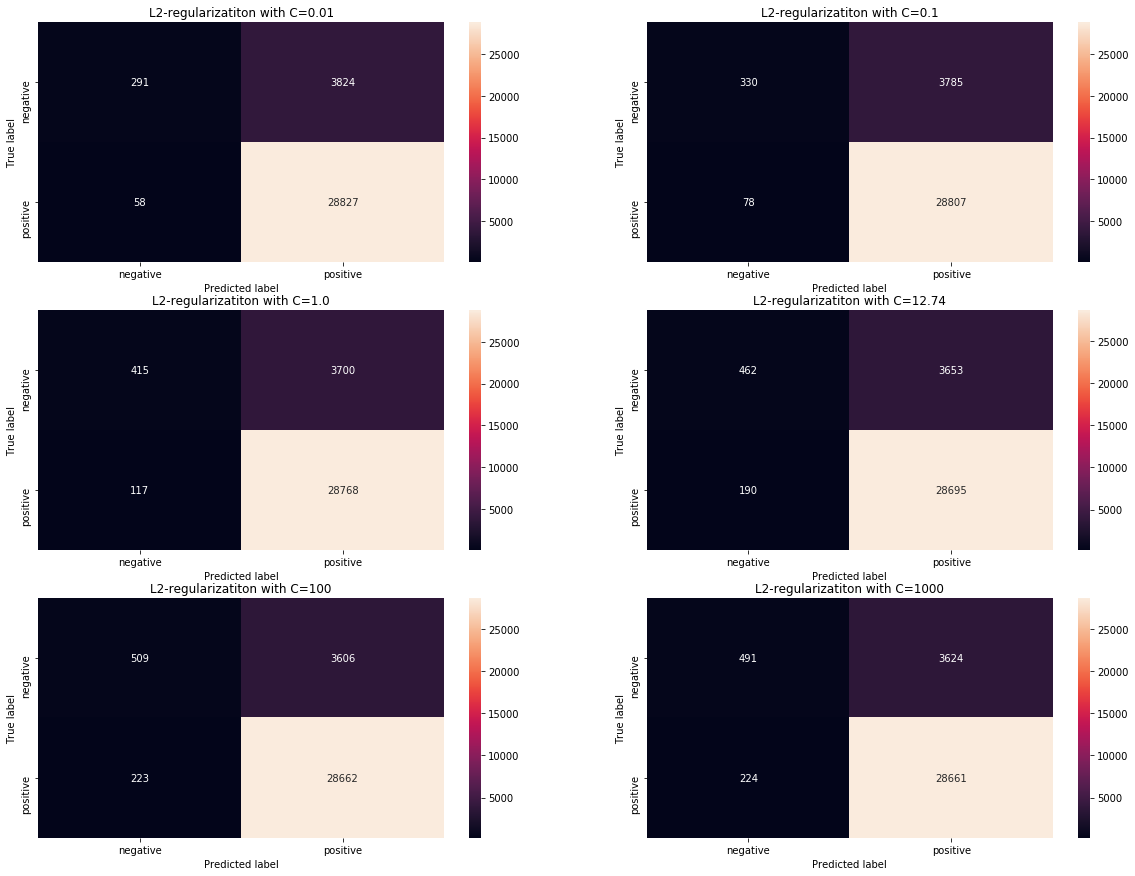

In [47]:
C_values=[0.010,0.1,1.0,12.74,100,1000]
plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,3,2)

# Observation 
**As the value of C(1 / lambda), Generalization is improved, which we can clearly seen that error on unseen data decreases**

# Multicolinearity check (pertubation test)

In [48]:
new_noise_added_train_data=add_noise(BOW1_train_std)

Adding noise to every feature is  -0.003715078680938332
count is  0
count is  10000
count is  20000
count is  30000
count is  40000
count is  50000
count is  60000


In [49]:
lr_multi_colinearity=LogisticRegression(penalty='l2', tol=0.0001, C=0.01,  n_jobs=-1)
lr_colinearity=lr_multi_colinearity.fit(new_noise_added_train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [50]:
print('Before pertubation',lr_colinearity.coef_[0])
print("**************************************")
print('After pertubation',lr_1.coef_[0])

Before pertubation [ 4.48758124e-03  4.40671033e-03  3.35566248e-04 ... -3.59127912e-06
  5.43196613e-04  5.43196613e-04]
**************************************
After pertubation [ 0.00448676  0.00440574  0.00033474 ... -0.0004068   0.00054424
  0.00054424]


In [51]:
np.sort(lr_1.coef_[0]-lr_colinearity.coef_[0])[-10:]

array([0.00074009, 0.00074009, 0.00074009, 0.00074009, 0.00074009,
       0.00074009, 0.00074009, 0.00074009, 0.00074009, 0.00074009])

**From above multicolinearity test we can observe that  features are not changling a lot due to small change in feature values  and maximum change around features is 0.00074769 , so we can conclude that features are not colinear.**

# feature importance

In [52]:
print_features(lr_1)

+----------------------------+---------+
| Top 20 important features  | Weight  |
+----------------------------+---------+
|           great            |  0.183  |
+----------------------------+---------+
|            good            |  0.136  |
+----------------------------+---------+
|            love            |  0.135  |
+----------------------------+---------+
|            best            |  0.131  |
+----------------------------+---------+
|         excellent          |  0.092  |
+----------------------------+---------+
|         delicious          |  0.085  |
+----------------------------+---------+
|          product           |  0.079  |
+----------------------------+---------+
|           loves            |  0.078  |
+----------------------------+---------+
|           price            |  0.074  |
+----------------------------+---------+
|          favorite          |  0.072  |
+----------------------------+---------+
|           tasty            |  0.064  |
+---------------

# L1 regularization with Bag of words - Bigrams

In [148]:
#C=[10, 1000,100,0.100, 5455.59,0.001]
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.001,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.1,  n_jobs=-1)
lr_2=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=1.0,  n_jobs=-1)
lr_3=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=10,  n_jobs=-1)
lr_4=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=100,  n_jobs=-1)
lr_5=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=5455.59,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

In [ ]:
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.001,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)

In [28]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(lr_1.predict(BOW1_test_std))
outputs.append(lr_2.predict(BOW1_test_std))
outputs.append(lr_3.predict(BOW1_test_std))
outputs.append(lr_4.predict(BOW1_test_std))
outputs.append(lr_5.predict(BOW1_test_std))
outputs.append(lr_6.predict(BOW1_test_std))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.881  | 0.999  |  0.881   |  0.937   |    49    |        0.0        | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.91  | 0.985  |  0.902   |  0.946   |  35901   |       0.031       | 0.01  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.907  | 0.984  |  0.898   |  0.944   |  50863   |       0.043       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.91  | 0.989  |  0.905   |  0.948   |  79068   |       0.068       |  10   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.895  | 0.992  |  0.891  

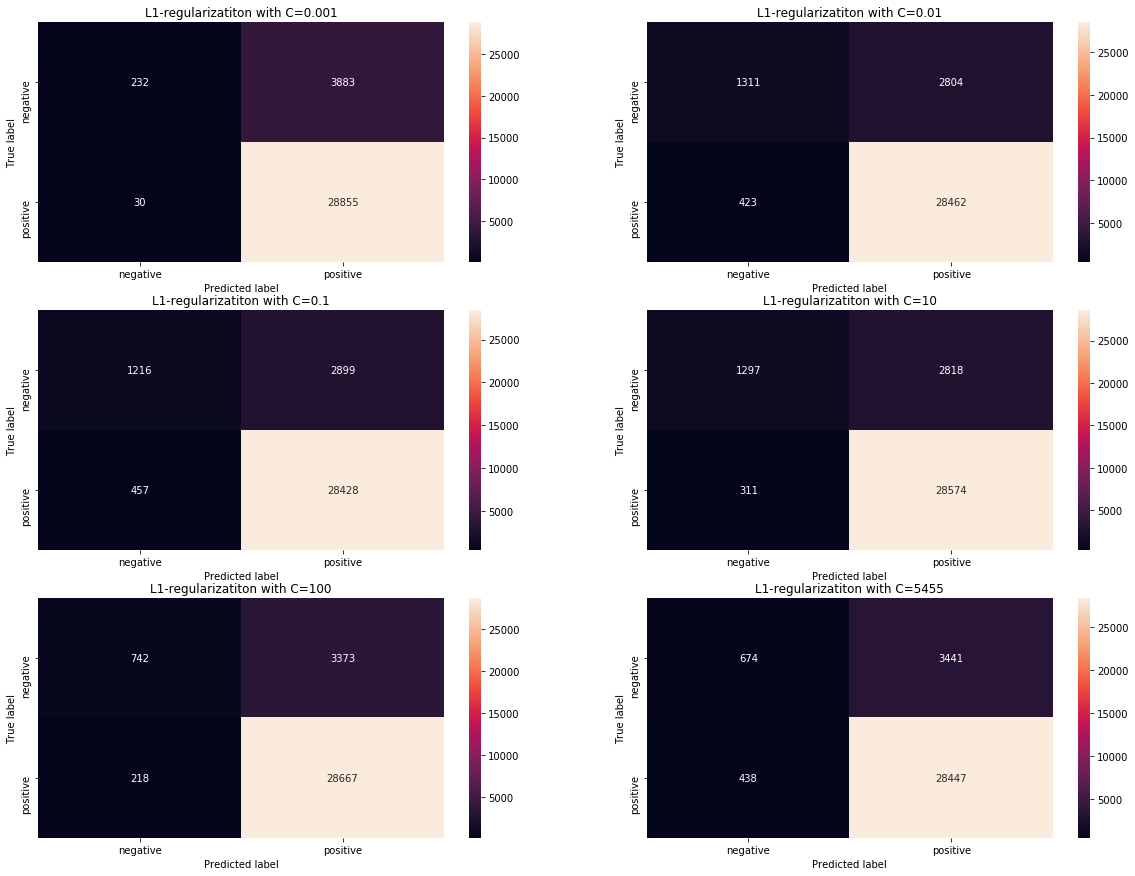

In [29]:
C_values=[0.001,0.1,0.1,10,100,5455]
plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,3,2)

# Observation
As the C decreases the the sparisty in weight vectors increasing , we can observe that for different values of C values .

1.For value of C=5455(inverse strength) we have sparsity is 83.1 (83.1% of weights are are non-zero)

2.For value of C=0.01 we have sparisty as 3 (only 3% are non-zero and remaining are zero)


From both 1 & 2,

we can conclude that as the C decreases the sparsity in the weight vectors increasing.


# Multicolinearity check (pertubation test)

In [ ]:
new_noise_added_train_data=add_noise(BOW1_train_std)

In [55]:
lr_multi_colinearity=LogisticRegression(penalty='l1', tol=0.0001, C=100,  n_jobs=-1)
lr_colinearity=lr_multi_colinearity.fit(new_noise_added_train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [57]:
print('After pertubation',lr_colinearity.coef_[0])
print("**************************************")
print('Before pertubation',lr_5.coef_[0])

After pertubation [ 0.          0.00389908  0.         ... -0.00632317  0.
  0.00011376]
**************************************
Before pertubation [0.01222699 0.         0.         ... 0.         0.         0.        ]


In [58]:
np.sort(lr_5.coef_[0]-lr_colinearity.coef_[0])[-20:]

array([0.09125652, 0.09695444, 0.09801514, 0.09855165, 0.10058579,
       0.10364766, 0.10636119, 0.10923902, 0.11055586, 0.11154997,
       0.12524099, 0.12851334, 0.12915713, 0.13186541, 0.1382764 ,
       0.14233147, 0.14737975, 0.18503357, 0.20539086, 0.20719337])

From above multicolinearity test we can observe that features are not changling a lot due to small change in feature values , so we can conclude that there is no colinearity among the features.
# So we can conclude that between features, there is no multicolinearity.

# feature importance

In [59]:
print_features(lr_5)

+----------------------------+---------+
| Top 20 important features  | Weight  |
+----------------------------+---------+
|         excellent          |  0.573  |
+----------------------------+---------+
|            love            |  0.506  |
+----------------------------+---------+
|           great            |  0.445  |
+----------------------------+---------+
|           bottle           |  0.397  |
+----------------------------+---------+
|            good            |  0.396  |
+----------------------------+---------+
|            best            |  0.324  |
+----------------------------+---------+
|           tasty            |  0.29   |
+----------------------------+---------+
|           loved            |  0.289  |
+----------------------------+---------+
|         delicious          |  0.287  |
+----------------------------+---------+
|         wonderful          |  0.287  |
+----------------------------+---------+
|           really           |  0.286  |
+---------------

# tf_idf - Unigrams

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow_unigrams=TfidfVectorizer(stop_words='english')
BOW1_train=bow_unigrams.fit(df_train_x)
BOW1_train=bow_unigrams.transform(df_train_x)
BOW1_test=bow_unigrams.transform(df_test_x)
print("The train data shape is ",BOW1_train.shape,"and test data shape is ",BOW1_test.shape)

The train data shape is  (67000, 90770) and test data shape is  (33000, 90770)


# Data standardization

In [61]:
std=StandardScaler(with_mean=False)
std=std.fit(BOW1_train)
BOW1_train = BOW1_train.astype(float)
BOW1_test = BOW1_test.astype(float)
BOW1_train_std=std.transform(BOW1_train)
BOW1_test_std=std.transform(BOW1_test)
print(BOW1_train_std.shape,BOW1_test_std.shape)

(67000, 90770) (33000, 90770)


# Label Encoder

In [62]:
from sklearn import preprocessing
bin=preprocessing.LabelEncoder()
df_train_y=bin.fit_transform(df_train_y)
df_test_y=bin.fit_transform(df_test_y)

# Hyperparameter tuning -Grid and random search 

In [ ]:
grid_search(BOW1_train_std,df_train_y,'tf_uni_grid.csv') #performed grid search
random_search(BOW1_train_std,df_train_y,'tf_uni_random.csv') # performed random search

In [63]:
print("*********** Results of Grid search ***********")
read_table_data('tf_uni_grid.csv')
print("*********** Results of Random search ***********")
read_table_data('tf_uni_random.csv')

*********** Results of Grid search ***********


,lambda_value,regularization,cv_score
2,0.010,l1,0.953928
1,0.001,l2,0.949042
4,0.100,l1,0.948340
0,0.001,l1,0.943371
3,0.010,l2,0.941260
6,1.000,l1,0.939800
8,10.000,l1,0.931198
10,100.000,l1,0.929188
5,0.100,l2,0.928392
12,1000.000,l1,0.927586


*********** Results of Random search ***********


,lambda_value,regularization,cv_score
3,0.255955,l1,0.944319
2,0.828643,l1,0.940027
7,1.676833,l1,0.936780
5,10000.000000,l1,0.929142
4,3088.843596,l1,0.928550
6,754.312006,l1,0.928070
9,115.139540,l1,0.925936
1,0.517947,l2,0.924069
0,6250.551925,l2,0.923041
8,2442.053095,l2,0.922704


The best results for Both L1 and L2 reguarization are found at :

**For L2 - > cv_score is around 0.95 and C=0.0010 , 0.01 , 0.1,1,2442,6250 (C= 1 / lambda)**

**For L1 - > cv_score is 0.95 and C=0.001,0.010,1.0,0.25,1.67,10000**

so lets try the test data validation on this parameters



# L2-regularization

In [33]:
#c=[0.0010 , 0.01 , 0.1,1,6250,2442]
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.0010,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.01,  n_jobs=-1)
lr_2=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.1,  n_jobs=-1)
lr_3=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=1,  n_jobs=-1)
lr_4=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=6250,  n_jobs=-1)
lr_5=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=2442,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [35]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(lr_1.predict(BOW1_test_std))
outputs.append(lr_2.predict(BOW1_test_std))
outputs.append(lr_3.predict(BOW1_test_std))
outputs.append(lr_4.predict(BOW1_test_std))
outputs.append(lr_5.predict(BOW1_test_std))
outputs.append(lr_6.predict(BOW1_test_std))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.916  |  0.97  |  0.896   |  0.942   |  90770   |        1.0        | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.922  | 0.948  |  0.885   |  0.935   |  90770   |        1.0        | 0.01  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.924  | 0.927  |  0.869   |  0.925   |  90770   |        1.0        |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.925  | 0.913  |  0.858   |  0.919   |  90770   |        1.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.931  | 0.841  |  0.806  

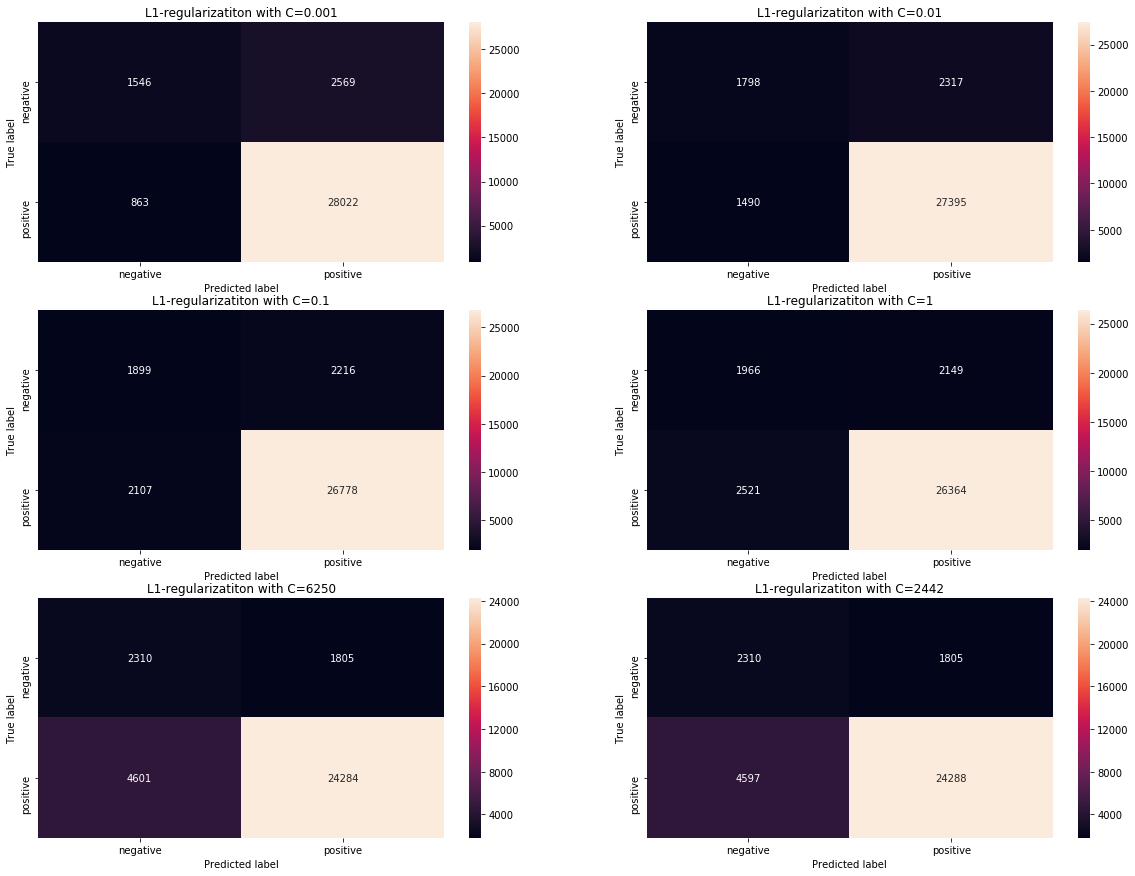

In [38]:
C_values=[0.0010 , 0.01 , 0.1,1,6250,2442]
plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,3,2)

# Observation 
As the value of C(1 / lambda), Generalization is improved, which we can clearly seen that error on unseen data decreases

# Multicolinearity check (pertubation test)

In [64]:
new_noise_added_train_data=add_noise(BOW1_train_std)

Adding noise to every feature is  0.004675002330205349
count is  0
count is  10000
count is  20000
count is  30000
count is  40000
count is  50000
count is  60000


In [65]:
lr_multi_colinearity=LogisticRegression(penalty='l2', tol=0.0001, C=0.01,  n_jobs=-1)
lr_colinearity=lr_multi_colinearity.fit(new_noise_added_train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [68]:
print('Before pertubation',lr_2.coef_[0])
print("**************************************")
print('After pertubation',lr_colinearity.coef_[0])

Before pertubation [3.08405965e-02 7.39714102e-03 2.19955580e-03 ... 7.07529481e-03
 9.76844450e-05 3.55584627e-05]
**************************************
After pertubation [3.08405965e-02 7.39714102e-03 2.19955580e-03 ... 7.07529481e-03
 9.76844450e-05 3.55584627e-05]


In [70]:
np.sort(lr_2.coef_[0]-lr_colinearity.coef_[0])[-10:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**From above multicolinearity test we can observe that features are not changling  due to small change in feature values , so we can conclude that features are not colinear.**

# feature importance

In [71]:
print_features(lr_2)

+----------------------------+---------+
| Top 20 important features  | Weight  |
+----------------------------+---------+
|           great            |  0.683  |
+----------------------------+---------+
|            best            |  0.506  |
+----------------------------+---------+
|            love            |  0.426  |
+----------------------------+---------+
|            good            |  0.373  |
+----------------------------+---------+
|         delicious          |  0.321  |
+----------------------------+---------+
|          favorite          |  0.31   |
+----------------------------+---------+
|           loves            |  0.286  |
+----------------------------+---------+
|         excellent          |  0.281  |
+----------------------------+---------+
|          perfect           |  0.277  |
+----------------------------+---------+
|         wonderful          |  0.269  |
+----------------------------+---------+
|           highly           |  0.229  |
+---------------

# L1 regularization

In [47]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.0010,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.01,  n_jobs=-1)
lr_2=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.1,  n_jobs=-1)
lr_3=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=1.0,  n_jobs=-1)
lr_4=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.25,  n_jobs=-1)
lr_5=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=1000,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [48]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(lr_1.predict(BOW1_test_std))
outputs.append(lr_2.predict(BOW1_test_std))
outputs.append(lr_3.predict(BOW1_test_std))
outputs.append(lr_4.predict(BOW1_test_std))
outputs.append(lr_5.predict(BOW1_test_std))
outputs.append(lr_6.predict(BOW1_test_std))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.882  | 0.999  |  0.882   |  0.937   |    46    |       0.001       | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.918  | 0.982  |  0.907   |  0.949   |   7593   |       0.084       | 0.01  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.929  | 0.957  |  0.898   |  0.943   |  18451   |       0.203       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.93  | 0.944  |  0.889   |  0.937   |  20112   |       0.222       | 0.25  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.928  | 0.928  |  0.875  

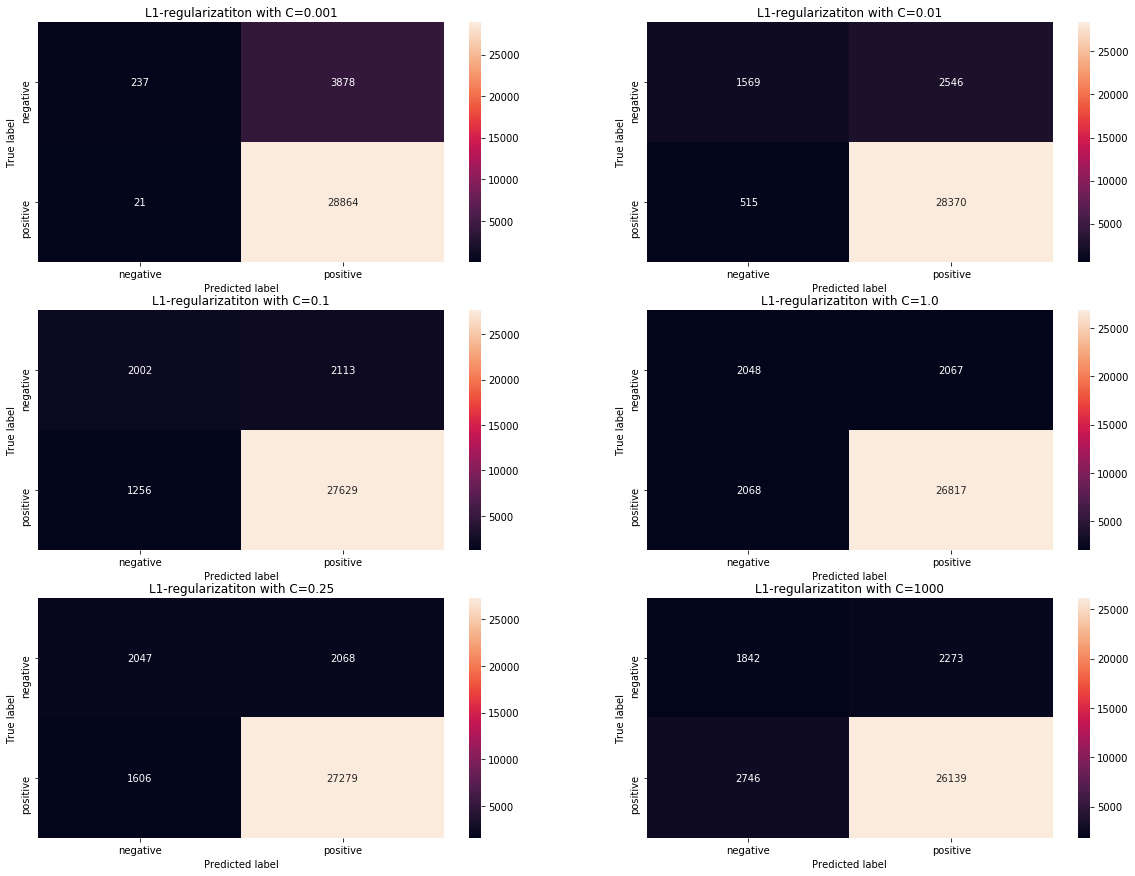

In [49]:
C_values=[0.001,0.01,0.1,1.0,0.25,1000]
plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,3,2)

# Observation
As the C decreases the the sparisty in weight vectors increasing , we can observe that for different values of C values .

1.For value of C=1000(inverse strength) we have sparsity is 31 (31% of weights are are non-zero)

2.For value of C=0.01 we have sparisty as 8.4 (only 8.4% are non-zero and remaining are zero)

From both 1 & 2,

we can conclude that as the C decreases the sparsity in the weight vectors increasing.

And one more point is as the C is decreasing the model is underfit, so the precision and recall score going to fall down as we can observe that one from the above table.

# Multicolinearity check (pertubation test)

In [ ]:
new_noise_added_train_data=add_noise(BOW1_train_std)

In [72]:
lr_multi_colinearity=LogisticRegression(penalty='l1', tol=0.0001, C=1000,  n_jobs=-1)
lr_colinearity=lr_multi_colinearity.fit(new_noise_added_train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [74]:
print('Before pertubation',lr_6.coef_[0])
print("**************************************")
print('After pertubation',lr_colinearity.coef_[0])

Before pertubation [0.21474247 0.04594157 0.         ... 0.01603066 0.         0.        ]
**************************************
After pertubation [0.21104274 0.03997007 0.         ... 0.         0.         0.        ]


In [75]:
np.sort(lr_6.coef_[0]-lr_colinearity.coef_[0])[-20:]

array([0.2371474 , 0.23748732, 0.24128306, 0.24159379, 0.2422542 ,
       0.24290642, 0.24962263, 0.25000816, 0.25001381, 0.25395506,
       0.25516809, 0.26430339, 0.274095  , 0.28653307, 0.28709294,
       0.29372219, 0.30553237, 0.30566803, 0.31170605, 0.31269272])

**From above multicolinearity test we can observe that features are changling due to small change in feature values , so we can conclude that there is colinearity among the features.**

# So we can conclude that between features, there is multicolinearity.

# feature importance

In [76]:
print_features(lr_6)

+----------------------------+---------+
| Top 20 important features  | Weight  |
+----------------------------+---------+
|           great            |  3.044  |
+----------------------------+---------+
|            yum             |  2.622  |
+----------------------------+---------+
|            best            |  2.183  |
+----------------------------+---------+
|           agave            |  2.128  |
+----------------------------+---------+
|           quinoa           |  2.068  |
+----------------------------+---------+
|           season           |  1.845  |
+----------------------------+---------+
|            love            |  1.841  |
+----------------------------+---------+
|         excellent          |  1.835  |
+----------------------------+---------+
|          perfect           |  1.81   |
+----------------------------+---------+
|         satisfying         |  1.782  |
+----------------------------+---------+
|          awesome           |  1.771  |
+---------------

# tf-idf bigrams vectorization

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow_unigrams=TfidfVectorizer(ngram_range=(1,2),stop_words='english')
BOW1_train=bow_unigrams.fit(df_train_x)
BOW1_train=bow_unigrams.transform(df_train_x)
BOW1_test=bow_unigrams.transform(df_test_x)
print("The train data shape is ",BOW1_train.shape,"and test data shape is ",BOW1_test.shape)

The train data shape is  (67000, 1169770) and test data shape is  (33000, 1169770)


# Data standardization

In [78]:
std=StandardScaler(with_mean=False)
std=std.fit(BOW1_train)
BOW1_train = BOW1_train.astype(float)
BOW1_test = BOW1_test.astype(float)
BOW1_train_std=std.transform(BOW1_train)
BOW1_test_std=std.transform(BOW1_test)
print(BOW1_train_std.shape,BOW1_test_std.shape)

(67000, 1169770) (33000, 1169770)


# Hyperparameter tuning - Grid and random search

In [ ]:
grid_search(BOW1_train_std,df_train_y,'tf_bi_grid.csv') #performed grid search
random_search(BOW1_train_std,df_train_y,'tf_bi_random.csv') # performed random searc

In [79]:
print("*********** Results of Grid search ***********")
read_table_data('tf_bi_grid.csv')
print("*********** Results of Random search ***********")
read_table_data('tf_bi_random.csv')

*********** Results of Grid search ***********


,lambda_value,regularization,cv_score
2,0.010,l1,0.952168
4,0.100,l1,0.946252
5,0.100,l2,0.944300
9,10.000,l2,0.944300
7,1.000,l2,0.944299
11,100.000,l2,0.944299
13,1000.000,l2,0.944299
3,0.010,l2,0.944227
1,0.001,l2,0.944013
0,0.001,l1,0.943487


*********** Results of Random search ***********


,lambda_value,regularization,cv_score
2,0.010,l1,0.952168
4,0.100,l1,0.946252
5,0.100,l2,0.944300
9,10.000,l2,0.944300
7,1.000,l2,0.944299
11,100.000,l2,0.944299
13,1000.000,l2,0.944299
3,0.010,l2,0.944227
1,0.001,l2,0.944013
0,0.001,l1,0.943487


The best results for Both L1 and L2 reguarization are found at :

**For L2 - > cv_score is 0.942893 and C=0.10 , 10 , 1,100,1000,0.001 (C= 1 / lambda)**

**For L1 - > cv_score is 0.942863 and C=0.1,0.010,0.001,1.0,10,100**

so lets try the test data validation on this parameters

# L2-regularization

In [9]:
#C=[0.10 , 10 , 1,100,1000,0.01]
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.10,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=10,  n_jobs=-1)
lr_2=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=1.0,  n_jobs=-1)
lr_3=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=100,  n_jobs=-1)
lr_4=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=1000,  n_jobs=-1)
lr_5=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.01,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-pa

In [10]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(lr_1.predict(BOW1_test_std))
outputs.append(lr_2.predict(BOW1_test_std))
outputs.append(lr_3.predict(BOW1_test_std))
outputs.append(lr_4.predict(BOW1_test_std))
outputs.append(lr_5.predict(BOW1_test_std))
outputs.append(lr_6.predict(BOW1_test_std))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

+--------+--------+----------+----------+----------+--------------------+------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero  |  C   |
|  ion   |        |          |          |          |      weights)      |      |
+--------+--------+----------+----------+----------+--------------------+------+
| 0.883  | 0.999  |  0.883   |  0.937   | 1169770  |        1.0         | 0.01 |
+--------+--------+----------+----------+----------+--------------------+------+
| 0.883  | 0.998  |  0.883   |  0.937   | 1169770  |        1.0         | 0.1  |
+--------+--------+----------+----------+----------+--------------------+------+
| 0.884  | 0.998  |  0.884   |  0.938   | 1169770  |        1.0         |  1   |
+--------+--------+----------+----------+----------+--------------------+------+
| 0.885  | 0.998  |  0.885   |  0.938   | 1169770  |        1.0         |  10  |
+--------+--------+----------+----------+----------+--------------------+------+
| 0.885  | 0.997  |  0.885  

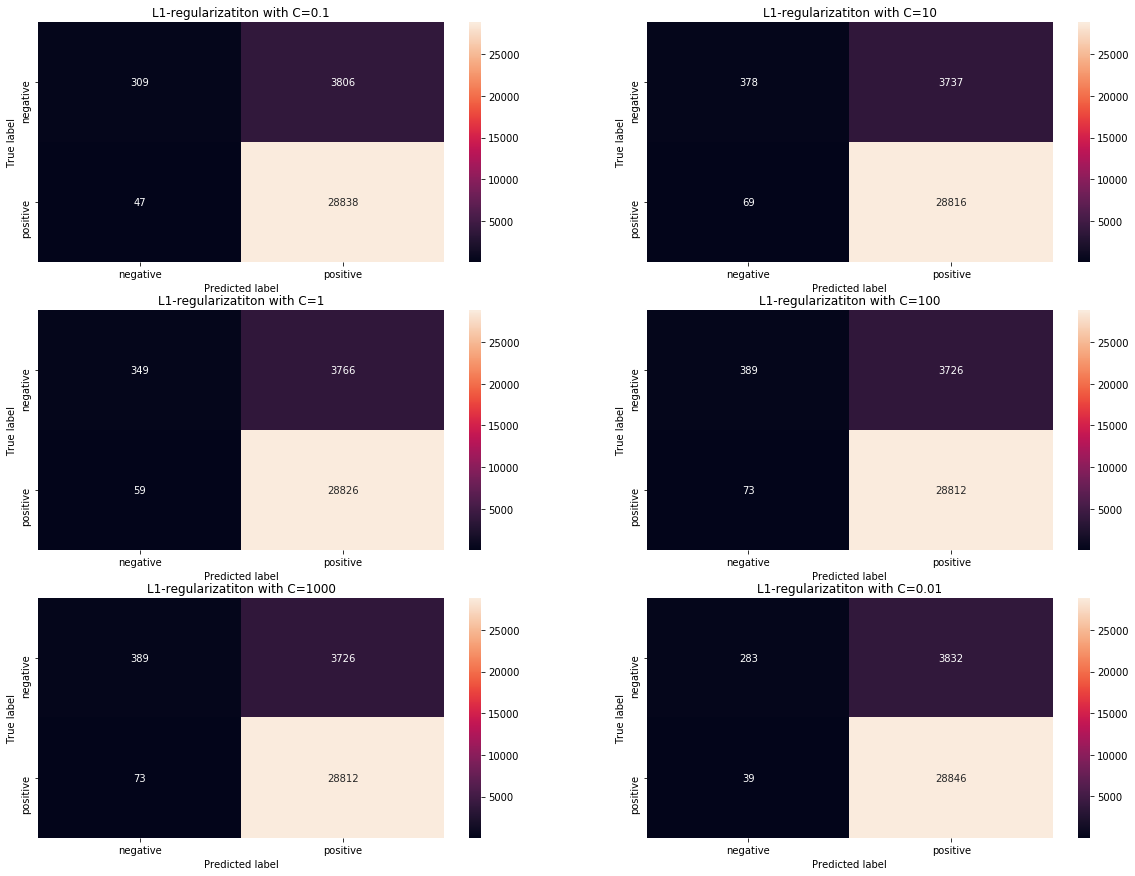

In [12]:
C_values=[0.10 , 10 , 1,100,1000,0.01]
plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,3,2)

# Observation 
**As the value of C(1 / lambda), Generalization is improved, which we can clearly seen that error on unseen data decreases**

# Multicolinearity check (pertubation test)

In [80]:
new_noise_added_train_data=add_noise(BOW1_train_std)

Adding noise to every feature is  -0.004571682209832734
count is  0
count is  10000
count is  20000
count is  30000
count is  40000
count is  50000
count is  60000


In [84]:
lr_multi_colinearity=LogisticRegression(penalty='l2', tol=0.0001, C=0.01,  n_jobs=-1)
lr_colinearity=lr_multi_colinearity.fit(new_noise_added_train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [85]:
print('Before pertubation',lr_6.coef_[0])
print("**************************************")
print('After pertubation',lr_colinearity.coef_[0])

Before pertubation [4.00381042e-03 2.63603872e-03 4.55135337e-04 ... 2.42268452e-06
 5.77703391e-04 5.77703391e-04]
**************************************
After pertubation [4.00381042e-03 2.63603872e-03 4.55135337e-04 ... 2.42268452e-06
 5.77703391e-04 5.77703391e-04]


In [86]:
np.sort(lr_6.coef_[0]-lr_colinearity.coef_[0])[-10:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**From above multicolinearity test we can observe that features are not changling a lot due to small change in feature values , so we can conclude that features are not colinear.**

# So features are not colinear

# feature importance

In [87]:
print_features(lr_6)

+----------------------------+---------+
| Top 20 important features  | Weight  |
+----------------------------+---------+
|           great            |  0.145  |
+----------------------------+---------+
|            good            |  0.119  |
+----------------------------+---------+
|            love            |  0.112  |
+----------------------------+---------+
|            best            |  0.11   |
+----------------------------+---------+
|         delicious          |  0.075  |
+----------------------------+---------+
|          product           |  0.073  |
+----------------------------+---------+
|         excellent          |  0.072  |
+----------------------------+---------+
|           loves            |  0.066  |
+----------------------------+---------+
|          favorite          |  0.065  |
+----------------------------+---------+
|           price            |  0.064  |
+----------------------------+---------+
|            just            |  0.063  |
+---------------

# L1 regularization

In [18]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.1,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.01,  n_jobs=-1)
lr_2=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.001,  n_jobs=-1)
lr_3=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=1.0,  n_jobs=-1)
lr_4=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=10,  n_jobs=-1)
lr_5=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=100,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [19]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(lr_1.predict(BOW1_test_std))
outputs.append(lr_2.predict(BOW1_test_std))
outputs.append(lr_3.predict(BOW1_test_std))
outputs.append(lr_4.predict(BOW1_test_std))
outputs.append(lr_5.predict(BOW1_test_std))
outputs.append(lr_6.predict(BOW1_test_std))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.886  | 0.998  |  0.886   |  0.939   |    49    |        0.0        | 0.001 |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.921  | 0.979  |  0.908   |  0.949   |  36578   |       0.031       | 0.01  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.917  | 0.978  |  0.903   |  0.946   |  48247   |       0.041       |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.913  | 0.978  |   0.9    |  0.945   |  59853   |       0.051       |  1.0  |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.898  | 0.994  |  0.896  

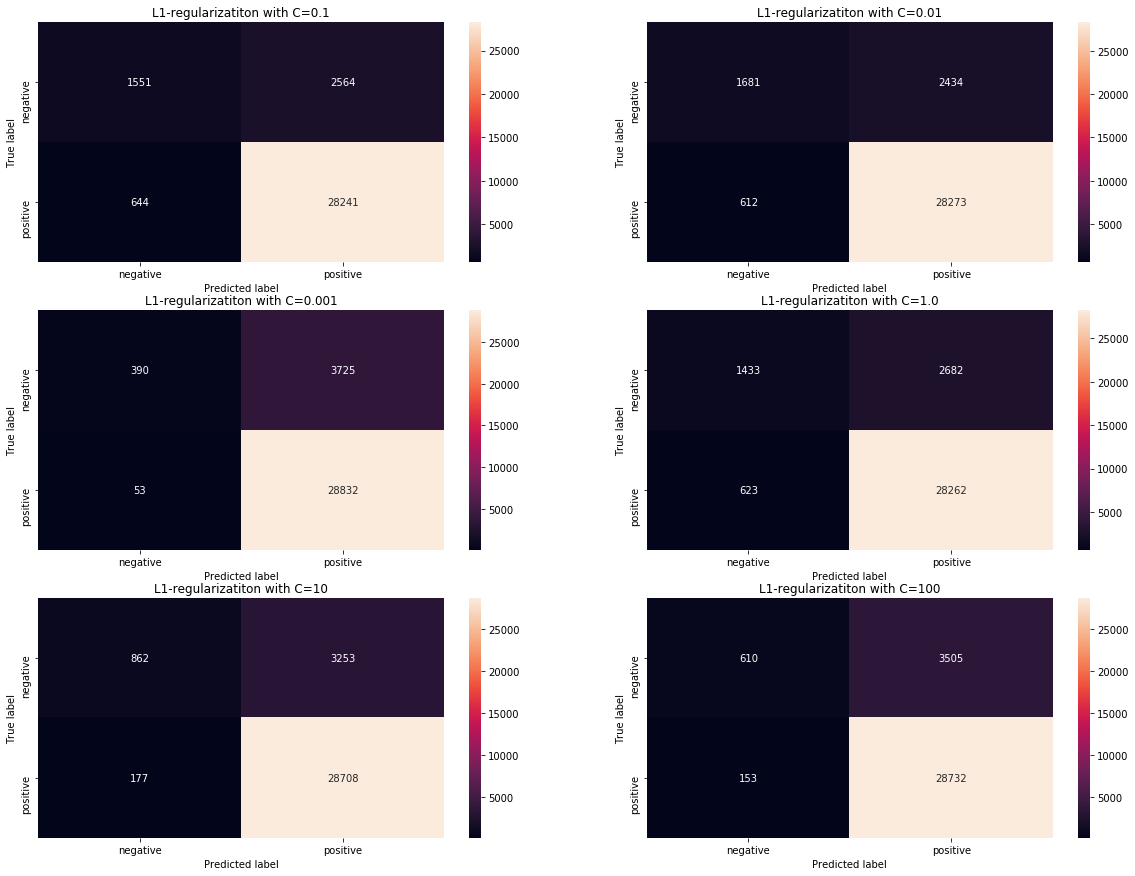

In [20]:
C_values=[0.1, 0.010,0.001,1.0,10,100]
plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,3,2)

# Observation
As the C increasing the the sparisty in weight vectors also increasing , we can observe that for different values of C values .

1.For value of C=100(inverse strength) we have sparsity is 23 (23% of weights are are non-zero)

2.For value of C=10 we have sparisty as 10 (only 10% are non-zero and remaining are zero)

From both 1 & 2,

we can conclude that as the C decreases the sparsity in the weight vectors also increasing.

And one more point is as the C is decreasing the model is underfit, so the preciioin and recall score going to fall down as we can observe that one from the above table.

# Multicolinearity check (pertubation test)

In [ ]:
new_noise_added_train_data=add_noise(BOW1_train_std)

In [88]:
lr_multi_colinearity=LogisticRegression(penalty='l1', tol=0.0001, C=100,  n_jobs=-1)
lr_colinearity=lr_multi_colinearity.fit(new_noise_added_train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [89]:
LR=LogisticRegression(penalty='l1', tol=0.0001, C=100,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [90]:
print('Before pertubation',lr_6.coef_[0])
print("**************************************")
print('After pertubation',lr_colinearity.coef_[0])

Before pertubation [0.00080505 0.00173802 0.         ... 0.         0.         0.        ]
**************************************
After pertubation [0.         0.00704507 0.         ... 0.         0.         0.        ]


In [91]:
np.sort(lr_6.coef_[0]-lr_colinearity.coef_[0])[-20:]

array([0.09809953, 0.09818423, 0.09978827, 0.10192775, 0.10416216,
       0.10447645, 0.10466907, 0.1062624 , 0.10698821, 0.11184561,
       0.11431271, 0.11535737, 0.11599387, 0.12094103, 0.12908477,
       0.13115942, 0.13880394, 0.14966688, 0.17829102, 0.18935972])

**From above multicolinearity test we can observe that features are not changling due to small change in feature values , so we can conclude that there is no colinearity among the features.**

# feature importance

In [92]:
print_features(lr_6)

+----------------------------+---------+
| Top 20 important features  | Weight  |
+----------------------------+---------+
|          favorite          |   0.4   |
+----------------------------+---------+
|          perfect           |  0.312  |
+----------------------------+---------+
|           great            |  0.293  |
+----------------------------+---------+
|            love            |  0.289  |
+----------------------------+---------+
|         wonderful          |  0.254  |
+----------------------------+---------+
|           bought           |  0.249  |
+----------------------------+---------+
|            best            |  0.245  |
+----------------------------+---------+
|           tried            |  0.242  |
+----------------------------+---------+
|            tea             |  0.232  |
+----------------------------+---------+
|           smooth           |  0.227  |
+----------------------------+---------+
|            good            |  0.22   |
+---------------

# word2vec model

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tf_idf_model=TfidfVectorizer(stop_words='english')
stop_words = tf_idf_model.get_stop_words()
model=[]   #df_train_x.shape,df_test_x.shape,df_train_y.shape,df_test_y.shape
for sent in df_train_x:
    temp=[]
    for word in sent.split():
        if word not in stop_words:
            temp.append(word)
    model.append(temp)
print(model[0][0:10])

['witty', 'little', 'book', 'makes', 'son', 'laugh', 'loud', 'recite', 'car', 'driving']


In [137]:
#!pip install google_compute_engine
from gensim.models import Word2Vec
amazon_model = Word2Vec(model, size=300, window=5, min_count=1, workers=4)

In [96]:
import numpy as np
word_vectors = amazon_model.wv
train_vec=[]
counter=0
for sentence in df_train_x:
    temp=np.zeros(300)
    length=0
    for word in sentence.split():
        if word in word_vectors:
            temp=temp+amazon_model.wv[word]
        else:
            #print(word," is not presnet in training model of word2vec")
            pass
        length+=1
    train_vec.append(temp/length)
    if(counter%10000==0):
        print(counter)
    counter+=1

0
10000
20000
30000
40000
50000
60000


In [99]:
import numpy as np
word_vectors = amazon_model.wv
test_vec=[]
counter=0
for sentence in df_test_x:
    temp=np.zeros(300)
    length=0
    for word in sentence.split():
        if word in word_vectors:
            temp=temp+amazon_model.wv[word]
        else:
            pass# print(word," is not presnet in training model of word2vec")
        length+=1
    test_vec.append(temp/length)
    if(counter%10000==0):
        print(counter)
    counter+=1

0
10000
20000
30000


# Data standardization

In [102]:
std=StandardScaler(with_mean=False)
std=std.fit(train_vec)
BOW1_train_std=std.transform(train_vec)
BOW1_test_std=std.transform(test_vec)
print(BOW1_train_std.shape,BOW1_test_std.shape)

(67000, 300) (33000, 300)


# Hyperparameter tuning -Grid and random search

In [ ]:
grid_search(BOW1_train_std,df_train_y,'word2vec_grid.csv') #performed grid search
random_search(BOW1_train_std,df_train_y,'word2vec_random.csv') # performed random searc

In [103]:
print("*********** Results of Grid search ***********")
read_table_data('word2vec_grid.csv')
print("*********** Results of Random search ***********")
read_table_data('word2vec_random.csv')

*********** Results of Grid search ***********


,lambda_value,regularization,cv_score
3,0.010,l2,0.946132
5,0.100,l2,0.945905
7,1.000,l2,0.945820
9,10.000,l2,0.945812
11,100.000,l2,0.945812
13,1000.000,l2,0.945812
1,0.001,l2,0.945000
10,100.000,l1,0.944365
8,10.000,l1,0.944338
6,1.000,l1,0.944285


*********** Results of Random search ***********


,lambda_value,regularization,cv_score
5,0.159986,l2,0.945871
0,6250.551925,l2,0.945812
3,294.705170,l2,0.945812
8,13.894955,l2,0.945812
9,596.362332,l2,0.945812
4,2.682696,l2,0.945805
7,0.255955,l1,0.944885
2,71.968567,l1,0.944654
6,1.325711,l1,0.944327
1,17.575106,l1,0.944086


The best results for Both L1 and L2 reguarization are found at :

**For L2 - > cv_score is 0.942893 and C=0.010 , 0.10 , 1,10,100,1000 (C= 1 / lambda)**

**For L1 - > cv_score is 0.942863 and C=10,1,1000,0.25,0.10,0.01**

so lets try the test data validation on this parameters



# L2-regularization with word2vec

In [41]:
#c=[0.10 , 10 , 1,100,1000,0.01 ]
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.10,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=10,  n_jobs=-1)
lr_2=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=1.0,  n_jobs=-1)
lr_3=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=100,  n_jobs=-1)
lr_4=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=1000,  n_jobs=-1)
lr_5=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.01,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/home/gurnatham_ravi/anaconda3/lib/python3.6/site-pa

In [43]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(lr_1.predict(BOW1_test_std))
outputs.append(lr_2.predict(BOW1_test_std))
outputs.append(lr_3.predict(BOW1_test_std))
outputs.append(lr_4.predict(BOW1_test_std))
outputs.append(lr_5.predict(BOW1_test_std))
outputs.append(lr_6.predict(BOW1_test_std))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

+--------+--------+----------+----------+----------+--------------------+------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero  |  C   |
|  ion   |        |          |          |          |      weights)      |      |
+--------+--------+----------+----------+----------+--------------------+------+
| 0.899  | 0.981  |  0.887   |  0.938   |   100    |        1.0         | 0.01 |
+--------+--------+----------+----------+----------+--------------------+------+
|  0.9   | 0.979  |  0.887   |  0.938   |   100    |        1.0         | 0.1  |
+--------+--------+----------+----------+----------+--------------------+------+
| 0.901  | 0.979  |  0.887   |  0.938   |   100    |        1.0         |  1   |
+--------+--------+----------+----------+----------+--------------------+------+
| 0.901  | 0.979  |  0.887   |  0.938   |   100    |        1.0         |  10  |
+--------+--------+----------+----------+----------+--------------------+------+
| 0.901  | 0.979  |  0.887  

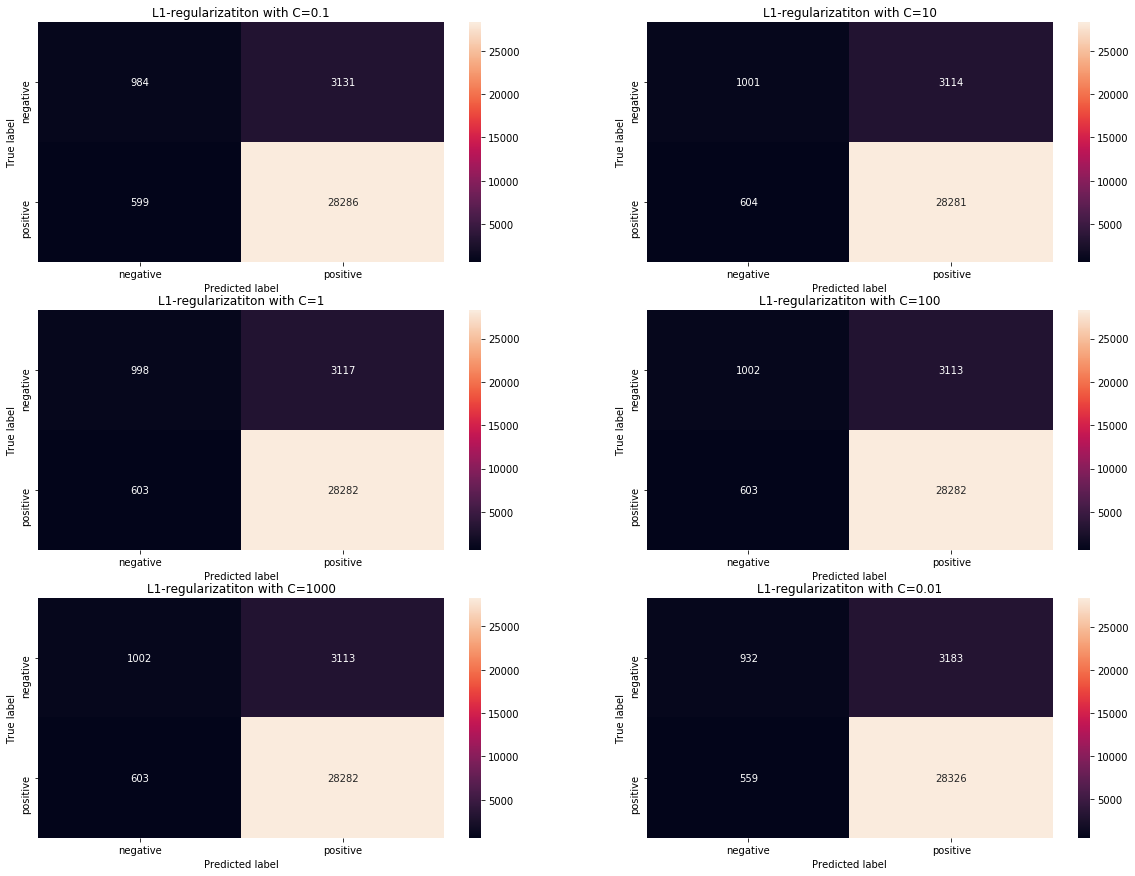

In [44]:
C_values=[0.10 , 10 , 1,100,1000,0.01]
plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,3,2)

# Observation 
As the value of C(1 / lambda), Generalization is improved, which we can clearly seen that error on unseen data decreases

# Multicolinearity check (pertubation test)

In [107]:
new_noise_added_train_data=BOW1_train_std
Epsilon=np.random.normal(0,0.01)
print('Adding noise is ',Epsilon)
count=0
for review in new_noise_added_train_data:
    if(count%10000==0):
        print('count is ',count)
    review+=Epsilon
    count+=1

Adding noise is  0.0083545625573513
count is  0
count is  10000
count is  20000
count is  30000
count is  40000
count is  50000
count is  60000


In [108]:
lr_multi_colinearity=LogisticRegression(penalty='l2', tol=0.0001, C=0.01,  n_jobs=-1)
lr_colinearity=lr_multi_colinearity.fit(new_noise_added_train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [110]:
LR=LogisticRegression(penalty='l2', tol=0.0001, C=0.010,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [114]:
print('Before pertubation',lr_6.coef_[0][:10])
print("**************************************")
print('After pertubation',lr_colinearity.coef_[0][:10])

Before pertubation [ 0.18215249  0.0967532   0.02236355  0.00426414  0.00866139 -0.116129
  0.09594435 -0.18034897 -0.13670899 -0.06531021]
**************************************
After pertubation [ 0.18215249  0.0967532   0.02236355  0.00426414  0.00866139 -0.116129
  0.09594435 -0.18034897 -0.13670899 -0.06531021]


In [116]:
np.sort(lr_6.coef_[0]-lr_colinearity.coef_[0])[-10:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**From above multicolinearity test we can observe that features are not changling a lot due to small change in feature values , so we can conclude that features are not colinear.**

# So features are not colinear

# Feature importance

**Feature importance does not make sense with resprect to the wod2vec because weights doesnot represent its words. So did not include the feature importance.**

# L1 regularization

In [51]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.01,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.1,  n_jobs=-1)
lr_2=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=1,  n_jobs=-1)
lr_3=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=17.57,  n_jobs=-1)
lr_4=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=100,  n_jobs=-1)
lr_5=LR.fit(BOW1_train_std,df_train_y)
LR=LogisticRegression(penalty='l1', tol=0.0001, C=1000,  n_jobs=-1)
lr_6=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [52]:
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
outputs=[]
outputs.append(lr_1.predict(BOW1_test_std))
outputs.append(lr_2.predict(BOW1_test_std))
outputs.append(lr_3.predict(BOW1_test_std))
outputs.append(lr_4.predict(BOW1_test_std))
outputs.append(lr_5.predict(BOW1_test_std))
outputs.append(lr_6.predict(BOW1_test_std))
cms=[]
for op in outputs:
    cms.append(confusion_matrix(df_test_y,op))
dfs=[]
for cm in cms:
    dfs.append(pd.DataFrame(cm,index=['negative','positive'],columns=['negative','positive']))

+--------+--------+----------+----------+----------+-------------------+-------+
| precis | recall | accuracy | f1-score | Non-zero | sparsity(Non-zero |   C   |
|  ion   |        |          |          |          |      weights)     |       |
+--------+--------+----------+----------+----------+-------------------+-------+
| 0.895  | 0.984  |  0.885   |  0.937   |    69    |       0.69        | 0.01  |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.9   |  0.98  |  0.887   |  0.938   |    98    |       0.98        |  0.1  |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.9   | 0.979  |  0.887   |  0.938   |   100    |        1.0        |   1   |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.9   | 0.979  |  0.887   |  0.938   |   100    |        1.0        | 17.57 |
+--------+--------+----------+----------+----------+-------------------+-------+
|  0.9   | 0.979  |  0.887  

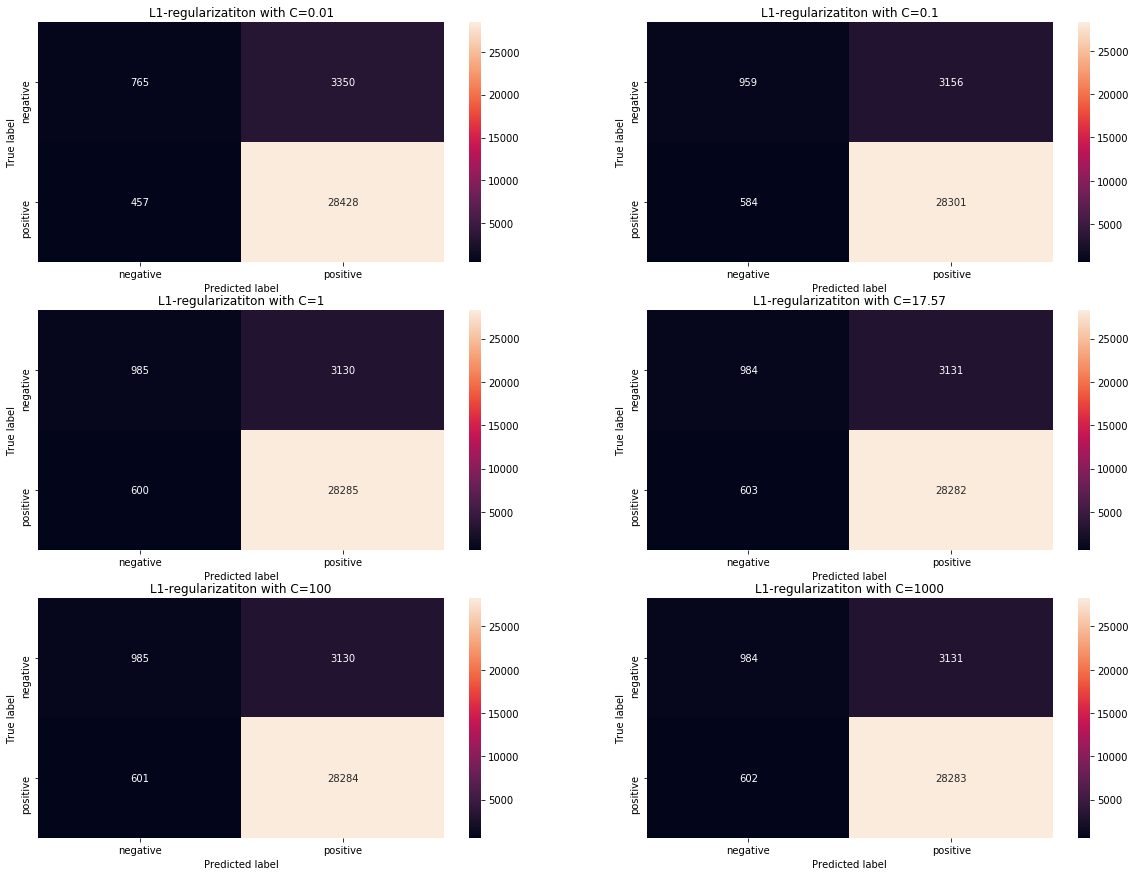

In [53]:
C_values=[0.01, 0.10,1,17.57,100,1000]
plot_confusion_matrix_table(C_values,outputs,df_test_y,lr_1,lr_2,lr_3,lr_4,lr_5,lr_6,3,2)

# Observation
As the C decreases the the sparisty in weight vectors increasing , we can observe that for different values of C values .

1.For value of C=1000(inverse strength) we have sparsity is 100 (100% of weights are are non-zero)

2.For value of C=0.01 we have sparisty as 69 (only 69% are non-zero and remaining are zero)

From both 1 & 2,

we can conclude that as the C decreases the sparsity in the weight vectors increasing.

And one more point is as the C is decreasing the model is underfit, so the precision and recall score going to fall down as we can observe that one from the above table.

# Multicolinearity check (pertubation test)

In [117]:
new_noise_added_train_data=BOW1_train_std
Epsilon=np.random.normal(0,0.01)
print('Adding noise is ',Epsilon)
count=0
for review in new_noise_added_train_data:
    if(count%10000==0):
        print('count is ',count)
    review+=Epsilon
    count+=1

Adding noise is  -0.002486673573054828
count is  0
count is  10000
count is  20000
count is  30000
count is  40000
count is  50000
count is  60000


In [118]:
lr_multi_colinearity=LogisticRegression(penalty='l1', tol=0.0001, C=0.01,  n_jobs=-1)
lr_colinearity=lr_multi_colinearity.fit(new_noise_added_train_data,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [119]:
LR=LogisticRegression(penalty='l1', tol=0.0001, C=0.01,  n_jobs=-1)
lr_1=LR.fit(BOW1_train_std,df_train_y)

/home/gurnatham_ravi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [120]:
print('After pertubation',lr_1.coef_[0][:10])
print("**************************************")
print('Before pertubation',lr_colinearity.coef_[0][:10])

After pertubation [ 0.          0.          0.          0.          0.          0.
  0.         -0.06085093  0.          0.        ]
**************************************
Before pertubation [ 0.          0.          0.          0.          0.          0.
  0.         -0.05605525  0.          0.        ]


In [121]:
np.sort(lr_1.coef_[0]-lr_colinearity.coef_[0])[-20:]

array([0.00317243, 0.00332893, 0.00352177, 0.00360433, 0.00395276,
       0.00417773, 0.0044742 , 0.00462299, 0.00474971, 0.0048686 ,
       0.00499473, 0.0050022 , 0.00533112, 0.00555291, 0.0058138 ,
       0.00759873, 0.00763409, 0.00792457, 0.00816954, 0.00843461])

**From above multicolinearity test we can observe that features are not changling a lot due to small change in feature values , so we can conclude that there is no multicolinearity among the features.**

# feature importance

**Feature importance does not make sense with resprect to the wod2vec because weights doesnot represent its words. So did not include the feature importance.**

# Conclusion

In [150]:
from beautifultable import BeautifulTable
type_model=['unigrams','unigrams','Bigrams','Bigrams','Tf-idf-unigrams','Tf-idf-unigrams','Tf-idf-Bigrams','Tf-idf-Bigrams','word2vec','word2vec']
reg=['L2','L1','L2','L1','L2','L1','L2','L1','L2','L1','L2','L1']
C=[0.01,4.3,0.01,100,0.01,1000,0.01,100,0.01,0.01]
cv_accuracy=[94.28,94.3,94.28,94.2856,94.12,92.75,94.5,93.5,94.6,94.3]
test_accuracy=[94.2,92.3,93.7,94.1,93.5,91.2,93.7,94,93.8,93.7]
precision=[92.8,93,88.3,89.5,92.2,92,88.3,89.1,89.9,89.5]
recall=[95.7,91.6,99.8,99.2,94.8,90.5,99.9,99.5,98.1,98.4]
table=BeautifulTable()
table.insert_column(0,"Type ",type_model)
table.insert_column(1,"Regularization ",reg)
table.insert_column(2,"C ",C)
table.insert_column(3,"cv-accuracy",cv_accuracy)
table.insert_column(4,"Test score ",test_accuracy)
table.insert_column(5,"precision ",precision)
table.insert_column(6,"recall ",recall)
print(table)

+-------------+-------------+------+----------+----------+----------+---------+
|    Type     | Regularizat |  C   | cv-accur | Test sco | precisio | recall  |
|             |    ion      |      |   acy    |   re     |    n     |         |
+-------------+-------------+------+----------+----------+----------+---------+
|  unigrams   |     L2      | 0.01 |  94.28   |   94.2   |   92.8   |  95.7   |
+-------------+-------------+------+----------+----------+----------+---------+
|  unigrams   |     L1      | 4.3  |   94.3   |   92.3   |    93    |  91.6   |
+-------------+-------------+------+----------+----------+----------+---------+
|   Bigrams   |     L2      | 0.01 |  94.28   |   93.7   |   88.3   |  99.8   |
+-------------+-------------+------+----------+----------+----------+---------+
|   Bigrams   |     L1      | 100  |  94.286  |   94.1   |   89.5   |  99.2   |
+-------------+-------------+------+----------+----------+----------+---------+
| Tf-idf-unig |     L2      | 0.01 |  94

**All vectorizations are performing well and each model f-1 score is more than 90% and having good precision and recall score**